In [51]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
#loading the dataset
#making Serial No. as index column
df=pd.read_csv('../input/graduate-admissions/Admission_Predict.csv',index_col='Serial No.')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [31]:
#Spliting the dataset between x and y
y=df['Chance of Admit ']
x=df.drop('Chance of Admit ',axis=1)

In [32]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [33]:
#Principal Component Analysis 

pca=PCA(n_components=2)
#fitting the dataset
pca.fit(x)


PCA(n_components=2)

In [34]:
#transforming data
x_pca=pca.transform(x)

In [36]:
#converting the pandas dataframe
x_pca

array([[-2.28744369e+01,  8.42160080e-01],
       [-6.43734030e+00, -3.35122195e+00],
       [ 2.22124309e+00, -2.74456803e+00],
       [-5.74498389e+00,  9.11522590e-04],
       [ 4.59412184e+00, -2.91271770e+00],
       [-1.52930698e+01,  1.22375203e+00],
       [-4.43631286e+00, -4.41199986e-01],
       [ 1.07587575e+01, -1.97087741e+00],
       [ 1.59331152e+01,  1.29650003e+00],
       [-5.78297941e+00, -2.19238627e+00],
       [-6.77996299e+00, -4.82348039e+00],
       [-1.08475420e+01, -1.08934670e+00],
       [-1.21773625e+01, -6.31091301e-01],
       [ 8.13647025e+00,  5.69940683e+00],
       [ 6.74023583e+00, -5.81224954e-01],
       [ 3.61621653e+00, -9.66724405e-01],
       [ 4.20012237e-03, -4.24163746e-01],
       [-1.35913368e+00, -2.22008801e+00],
       [-2.18080404e+00,  1.81845752e+00],
       [ 1.47505675e+01,  1.18977488e+00],
       [ 4.59692505e+00,  1.61350997e+00],
       [-1.01331297e+01,  2.27502280e+00],
       [-1.40384636e+01,  3.11466233e+00],
       [-2.

In [37]:
x_pca=pd.DataFrame(x_pca,columns=['PC1','PC2'])
x_pca


,PC1,PC2
0,-22.874437,0.842160
1,-6.437340,-3.351222
2,2.221243,-2.744568
3,-5.744984,0.000912
4,4.594122,-2.912718
...,...,...
395,-7.597382,-0.819780
396,-7.190055,-3.967099
397,-15.749376,2.146158
398,6.186817,-1.799805


In [40]:
x_pca

,PC1,PC2
0,-22.874437,0.842160
1,-6.437340,-3.351222
2,2.221243,-2.744568
3,-5.744984,0.000912
4,4.594122,-2.912718
...,...,...
395,-7.597382,-0.819780
396,-7.190055,-3.967099
397,-15.749376,2.146158
398,6.186817,-1.799805


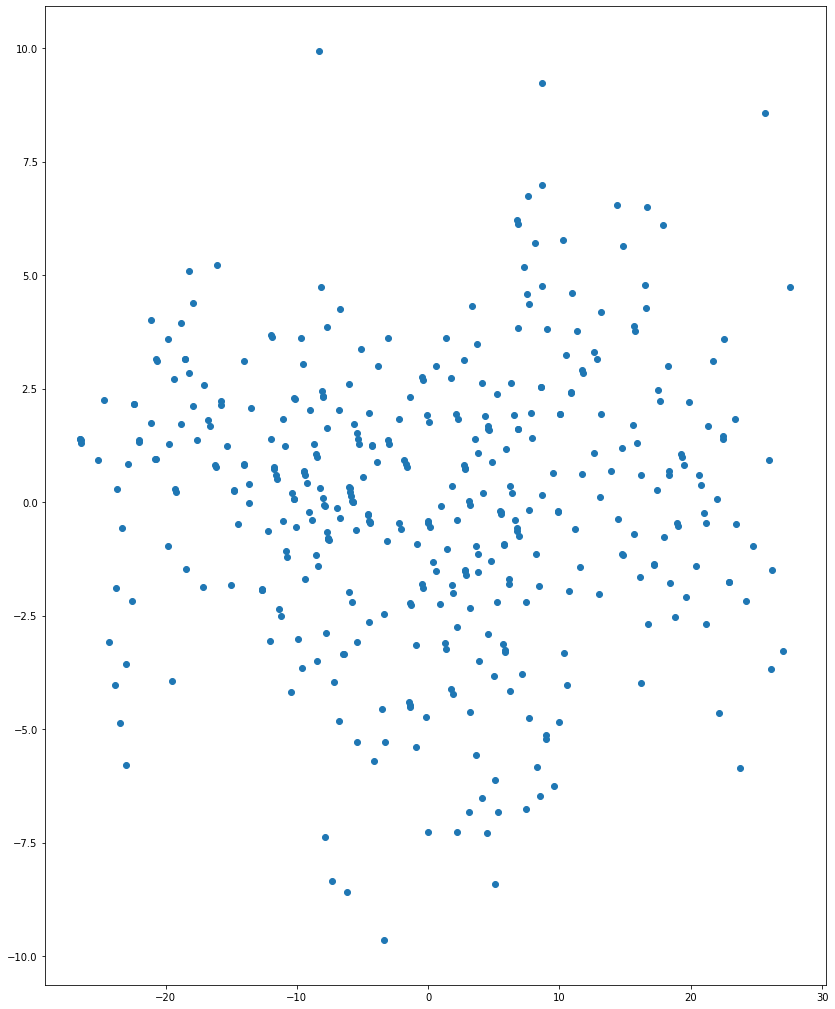

In [38]:
#ploting the dataset
plt.figure(figsize=(14,18))
#plotting scatter plot
plt.scatter(x_pca['PC1'],x_pca['PC2'])
plt.show()

In [41]:
PCA_max=np.argmax(x_pca['PC1'])
PCA_min=np.argmin(x_pca['PC1'])



In [42]:
print(PCA_max)
print(PCA_min)

377
202


In [43]:
#pca max 
x.iloc[PCA_max,:]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [44]:
x.iloc[PCA_min,:]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [48]:
#assignig the variable to the data

In [52]:
#scaling the dataset
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

In [61]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [62]:
y_train

Serial No.
40     0.48
168    0.64
384    0.62
222    0.75
352    0.73
       ... 
256    0.79
73     0.93
397    0.84
236    0.88
38     0.58
Name: Chance of Admit , Length: 280, dtype: float64

In [63]:
#trainig the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

model.score(x_test,y_test)

In [65]:
#getting score of the model
model.score(x_test,y_test)

0.8103743116598119

In [67]:
pred=model.predict(x_test)

Text(0, 0.5, 'Actual value')

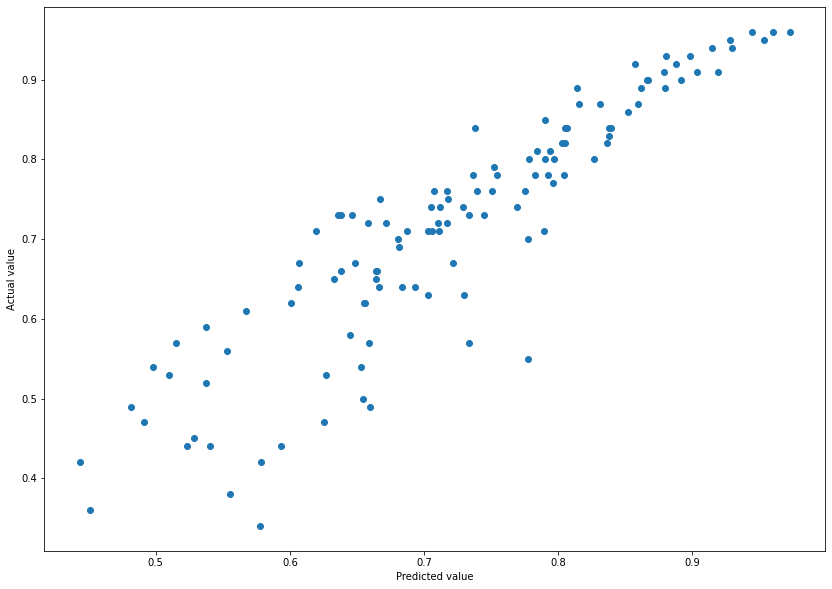

In [70]:
#ploting the 
plt.figure(figsize=(14,10))
plt.plot(pred,y_test,'o')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [ ]:
,